In [1]:
# No 2
# Data analysis
# 1) Plot FFT
# 2) Tanda kendaraan kecil, tanda kendaraan besar
# 4) Range Frequency
# 5) Kendaraan kecil, sedang, besar
# 6) Data atau Signal filtering dari sinyal accelerometer
# 6) i)  Filter LPF/ BPF/ HPF/ Notch
# 6) ii) Plot Signal after filter, bandingin dengan aslinya


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import sin, cos, pi
from scipy.signal import butter, filtfilt
from scipy.integrate import cumtrapz
plt.style.use('seaborn')

0.11308745853602886


<function matplotlib.pyplot.show(close=None, block=None)>

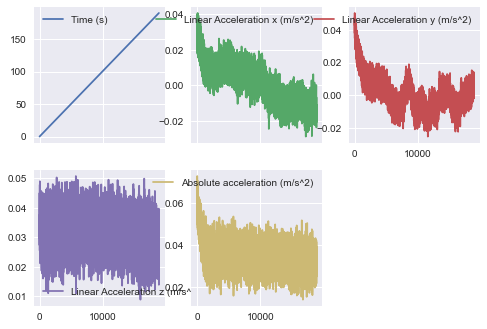

In [2]:
# dat = xl.open_workbook('13-4-22.xls')
df = pd.read_excel('Acceleration without g 2022-04-18 09-34-53.xls')
# dat = dat.drop(dat.columns[[0,4]], axis= 1, inplace= True)
dat = df.to_numpy()
t, ax, ay, az, amag = dat.T
print(t[10])
df.plot(subplots=True,sharex=True,layout=(2,3))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

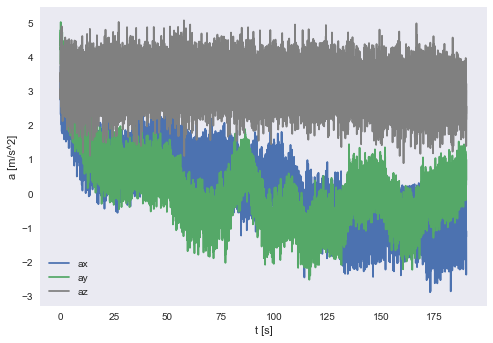

In [3]:
plt.xlabel("t [s]")
plt.ylabel("a [m/s^2]")
plt.plot(t, ax*100, label="ax")
plt.plot(t, ay*100, label="ay")
plt.plot(t, az*100, label="az", c='gray')
plt.grid()
plt.legend()
plt.show

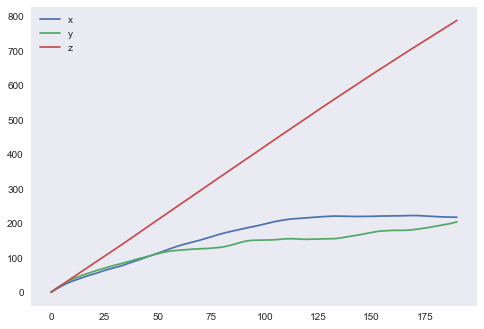

In [4]:
dt = t[1]-t[0]
x = [0]
y = [0]
z = [0]

for i in np.arange(len(t)-1):
    x = x + [x[-1] + ax[i]+ dt]
    y = y + [y[-1] + ay[i]+ dt]
    z = z + [z[-1] + az[i]+ dt]

plt.plot(t,x, label="x")
plt.plot(t,y, label="y")
plt.plot(t,z, label="z")
plt.legend()
plt.grid()
plt.show()

In [5]:
print(dt)
print(t[-1])

0.010079000145196915
189.99158566677943


[27.31438156  +0.j         -5.35549752-107.93684289j
 14.78544229 -28.88365618j ... -0.19808507  -0.3053282j
 -0.10682323  -0.25184527j  0.40452346  +0.j        ]


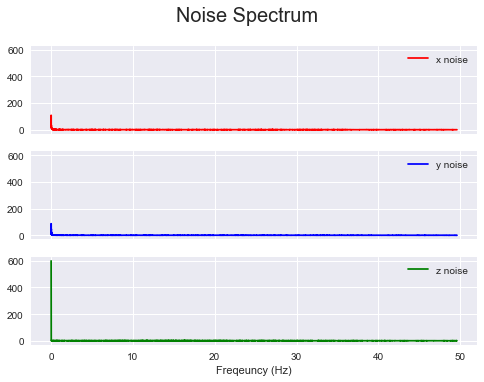

In [6]:
# Try to remove noise via Fourier analysis
    # Discrete Fourier Transform sample frequencies
freq = np.fft.rfftfreq(df['Linear Acceleration x (m/s^2)'].size,d=dt)

# Compute the Fast Fourier Transform (FFT) of acceleration signals
# fft_x = np.fft.rfft(df['Linear Acceleration x (m/s^2)']) * 100
fft_x = np.fft.rfft(df['Linear Acceleration x (m/s^2)'])
fft_y = np.fft.rfft(df['Linear Acceleration y (m/s^2)'])
fft_z = np.fft.rfft(df['Linear Acceleration z (m/s^2)'])

# Plot Frequency spectrum
fig4,[ax1,ax2,ax3] = plt.subplots(3,1,sharex=True,sharey=True)
fig4.suptitle('Noise Spectrum',fontsize=20)
ax1.plot(freq,abs(fft_x),c='r',label='x noise')
ax1.legend()
ax2.plot(freq,abs(fft_y),c='b',label='y noise')
ax2.legend()
ax3.plot(freq,abs(fft_z),c='g',label='z noise')
ax3.legend()
ax3.set_xlabel('Freqeuncy (Hz)')
print(fft_x)
plt.show()

[ 2.73143816 +0.j         -0.53554975-10.79368429j
  1.47854423 -2.88836562j ... -0.19808507 -0.3053282j
 -0.10682323 -0.25184527j  0.40452346 +0.j        ]


C:\Users\Khrzm\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\tools.py:229: UserWarning: When passing multiple axes, layout keyword is ignored.
  warnings.warn(
C:\Users\Khrzm\AppData\Local\Temp\ipykernel_18460\498253724.py:22: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  df.plot(y=cols_new,subplots=True,layout=(1,3),ax=rawplot,


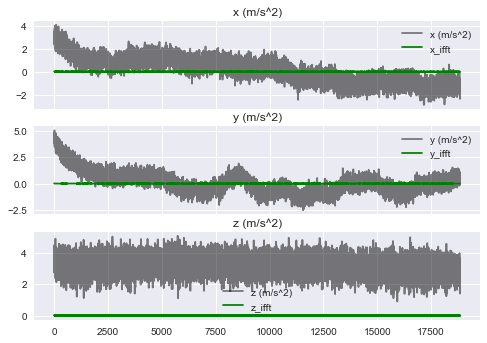

In [7]:
# Attenuate noise in X,Y,Z below 10Hz by 10 dB
atten_x_fft = np.where(freq < 10,fft_x * 0.1, fft_x) 
atten_y_fft = np.where(freq < 10,fft_y * 0.1, fft_y) 
atten_z_fft = np.where(freq < 10,fft_z * 0.1, fft_z) 
print(atten_x_fft)

# Compute inverse of discrete Fourier Transform 
df['x_ifft'] = np.fft.irfft(atten_x_fft,n=df.shape[0])
df['y_ifft'] = np.fft.irfft(atten_y_fft,n=df.shape[0])
df['z_ifft'] = np.fft.irfft(atten_z_fft,n=df.shape[0])

# Normalize
df['x (m/s^2)'] = df.multiply(100)['Linear Acceleration x (m/s^2)']
df['y (m/s^2)'] = df.multiply(100)['Linear Acceleration y (m/s^2)']
df['z (m/s^2)'] = df.multiply(100)['Linear Acceleration z (m/s^2)']

# Plot new acceleration signals
# cols_raw = ['Linear Acceleration x (m/s^2)','Linear Acceleration y (m/s^2)','Linear Acceleration z (m/s^2)']
cols_raw = ['x (m/s^2)', 'y (m/s^2)', 'z (m/s^2)']
cols_new = ['x_ifft','y_ifft','z_ifft']
rawplot = df.plot( y=cols_raw, subplots=True, sharex=True,style='k',title=cols_raw,alpha=0.5 )
df.plot(y=cols_new,subplots=True,layout=(1,3),ax=rawplot,
sharex=True,style='g')
plt.show()